In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
import yfinance as yf

# TVS Motor
tvs = yf.download("TVSMOTOR.NS", start="2023-08-01", end="2025-08-01")

# Nifty 50
nifty = yf.download("^NSEI", start="2023-08-01", end="2025-08-01")

print(tvs.head())
print(nifty.head())


C:\Users\aacha\AppData\Local\Temp\ipykernel_15696\3734906008.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tvs = yf.download("TVSMOTOR.NS", start="2023-08-01", end="2025-08-01")
[*********************100%***********************]  1 of 1 completed
C:\Users\aacha\AppData\Local\Temp\ipykernel_15696\3734906008.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nifty = yf.download("^NSEI", start="2023-08-01", end="2025-08-01")
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker      TVSMOTOR.NS  TVSMOTOR.NS  TVSMOTOR.NS  TVSMOTOR.NS TVSMOTOR.NS
Date                                                                      
2023-08-01  1358.671875  1368.194678  1348.107720  1363.929251      325587
2023-08-02  1368.640991  1384.760155  1351.579525  1363.929236     1941995
2023-08-03  1352.273804  1380.197178  1343.495084  1370.823192     1042110
2023-08-04  1347.859741  1373.799099  1335.609080  1360.953414      539333
2023-08-07  1329.508667  1346.470963  1320.928288  1346.470963      866160
Price              Close          High           Low          Open  Volume
Ticker             ^NSEI         ^NSEI         ^NSEI         ^NSEI   ^NSEI
Date                                                                      
2023-08-01  19733.550781  19795.599609  19704.599609  19784.000000  298000
2023-08-02  19526.550781  19678.250000  19423.550781  19655.400391  290700
2023-08-03  19381.650391 

In [20]:
print("TVS Motor:")
print(tvs.info())
print(tvs.describe())




TVS Motor:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 494 entries, 2023-08-01 to 2025-07-31
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Close, TVSMOTOR.NS)   494 non-null    float64
 1   (High, TVSMOTOR.NS)    494 non-null    float64
 2   (Low, TVSMOTOR.NS)     494 non-null    float64
 3   (Open, TVSMOTOR.NS)    494 non-null    float64
 4   (Volume, TVSMOTOR.NS)  494 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 23.2 KB
None
Price         Close         High          Low         Open        Volume
Ticker  TVSMOTOR.NS  TVSMOTOR.NS  TVSMOTOR.NS  TVSMOTOR.NS   TVSMOTOR.NS
count    494.000000   494.000000   494.000000   494.000000  4.940000e+02
mean    2265.506279  2294.132233  2235.319153  2267.244273  9.235999e+05
std      433.826375   440.321051   427.978694   435.486103  5.888318e+05
min     1320.829224  1330.153368  1306.396243  1320.382693  0.000000e+00
25%     

In [5]:
print("\nNifty 50:")
print(nifty.info())
print(nifty.describe())


Nifty 50:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 494 entries, 2023-08-01 to 2025-07-31
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, ^NSEI)   494 non-null    float64
 1   (High, ^NSEI)    494 non-null    float64
 2   (Low, ^NSEI)     494 non-null    float64
 3   (Open, ^NSEI)    494 non-null    float64
 4   (Volume, ^NSEI)  494 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 23.2 KB
None
Price          Close          High           Low          Open        Volume
Ticker         ^NSEI         ^NSEI         ^NSEI         ^NSEI         ^NSEI
count     494.000000    494.000000    494.000000    494.000000  4.940000e+02
mean    22894.425912  23001.142123  22782.124810  22901.412137  3.066294e+05
std      1903.045437   1918.419392   1891.421284   1904.256162  1.055060e+05
min     18857.250000  19041.699219  18837.849609  18928.750000  0.000000e+00
25%     21773.449219  2185

In [6]:
print("\nMissing values TVS:\n", tvs.isnull().sum())
print("\nMissing values Nifty:\n", nifty.isnull().sum())


Missing values TVS:
 Price   Ticker     
Close   TVSMOTOR.NS    0
High    TVSMOTOR.NS    0
Low     TVSMOTOR.NS    0
Open    TVSMOTOR.NS    0
Volume  TVSMOTOR.NS    0
dtype: int64

Missing values Nifty:
 Price   Ticker
Close   ^NSEI     0
High    ^NSEI     0
Low     ^NSEI     0
Open    ^NSEI     0
Volume  ^NSEI     0
dtype: int64


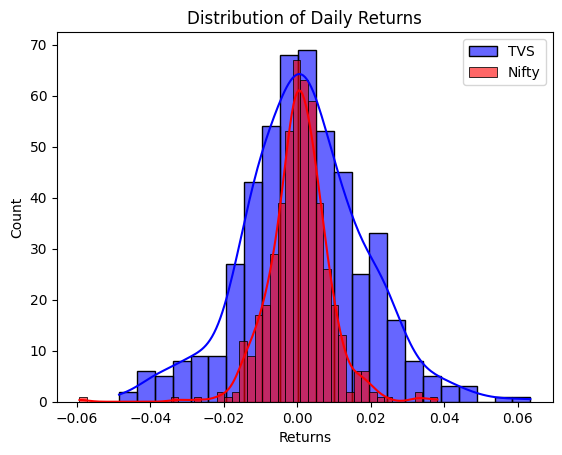

In [21]:
tvs['Returns'] = tvs['Close'].pct_change()
nifty['Returns'] = nifty['Close'].pct_change()

sns.histplot(tvs['Returns'].dropna(), kde=True, color="blue", label="TVS", alpha=0.6)
sns.histplot(nifty['Returns'].dropna(), kde=True, color="red", label="Nifty", alpha=0.6)
plt.legend()
plt.title("Distribution of Daily Returns")
plt.show()

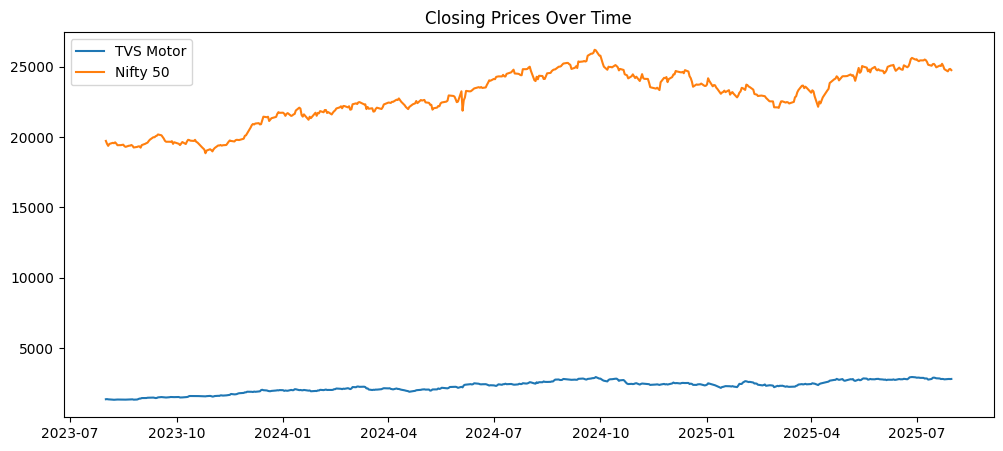

In [22]:
plt.figure(figsize=(12,5))
plt.plot(tvs['Close'], label="TVS Motor")
plt.plot(nifty['Close'], label="Nifty 50")
plt.title("Closing Prices Over Time")
plt.legend()
plt.show()

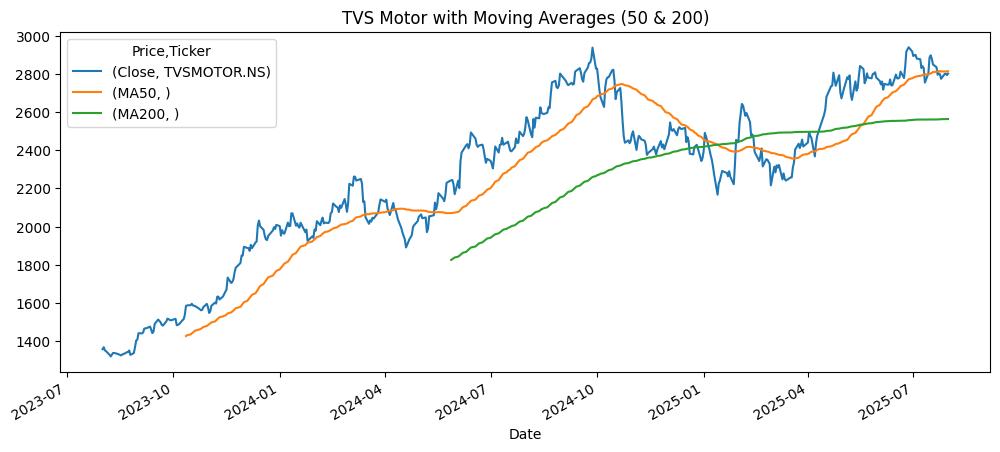

In [23]:
tvs['MA50'] = tvs['Close'].rolling(50).mean()
tvs['MA200'] = tvs['Close'].rolling(200).mean()

tvs[['Close','MA50','MA200']].plot(figsize=(12,5))
plt.title("TVS Motor with Moving Averages (50 & 200)")
plt.show()

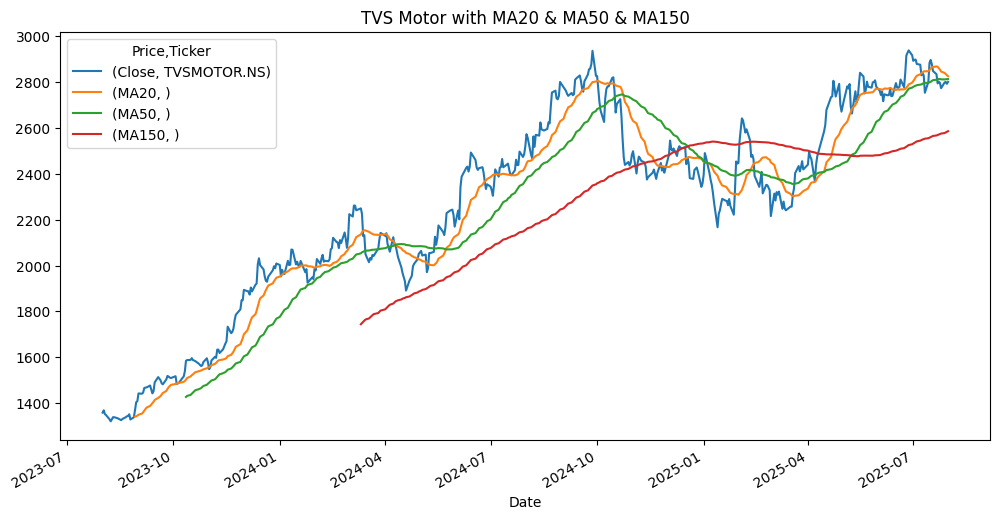

In [42]:
import numpy as np
tvs['MA20'] = tvs['Close'].rolling(20).mean()
tvs['MA50'] = tvs['Close'].rolling(50).mean()
tvs['MA150'] = tvs['Close'].rolling(150).mean()



delta = tvs['Close'].diff()
gain = delta.where(delta > 0, 0.0)
loss = -delta.where(delta < 0, 0.0)

avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss
tvs['RSI'] = 100 - (100 / (1 + rs))



tvs['EMA12'] = tvs['Close'].ewm(span=12, adjust=False).mean()
tvs['EMA26'] = tvs['Close'].ewm(span=26, adjust=False).mean()
tvs['MACD'] = tvs['EMA12'] - tvs['EMA26']
tvs['Signal'] = tvs['MACD'].ewm(span=9, adjust=False).mean()


tvs[['Close','MA20','MA50','MA150']].plot(figsize=(12,6))
plt.title("TVS Motor with MA20 & MA50 & MA150")
plt.show()


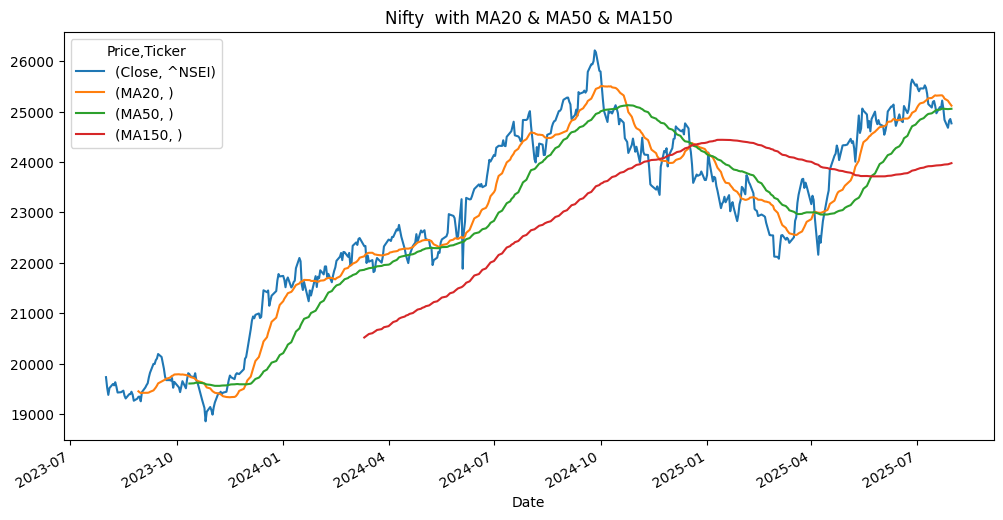

In [37]:
nifty['MA20'] = nifty['Close'].rolling(20).mean()
nifty['MA50'] = nifty['Close'].rolling(50).mean()
nifty['MA150'] = nifty['Close'].rolling(150).mean()



delta = tvs['Close'].diff()
gain = delta.where(delta > 0, 0.0)
loss = -delta.where(delta < 0, 0.0)

avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss
tvs['RSI'] = 100 - (100 / (1 + rs))



nifty['EMA12'] = nifty['Close'].ewm(span=12, adjust=False).mean()
nifty['EMA26'] = nifty['Close'].ewm(span=26, adjust=False).mean()
nifty['MACD'] = nifty['EMA12'] - nifty['EMA26']
nifty['Signal'] = nifty['MACD'].ewm(span=9, adjust=False).mean()


nifty[['Close','MA20','MA50','MA150']].plot(figsize=(12,6))
plt.title("Nifty  with MA20 & MA50 & MA150")
plt.show()

Sharpe TVS: 1.5454411030200017
Sharpe Nifty: 0.9445893476874091


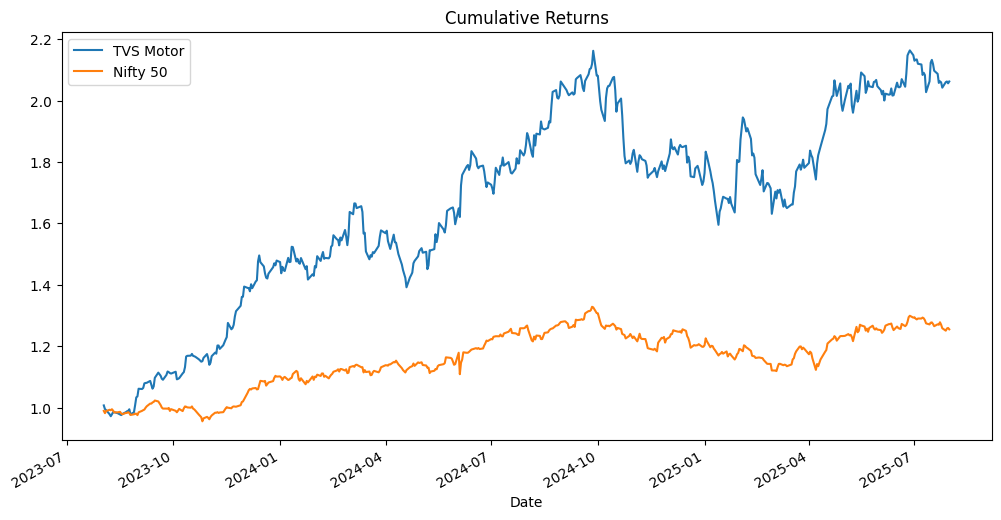

In [26]:

sharpe_tvs = tvs['Returns'].mean() / tvs['Returns'].std() * np.sqrt(252)
sharpe_nifty = nifty['Returns'].mean() / nifty['Returns'].std() * np.sqrt(252)

print("Sharpe TVS:", sharpe_tvs)
print("Sharpe Nifty:", sharpe_nifty)


((1 + tvs['Returns']).cumprod()).plot(label="TVS Motor", figsize=(12,6))
((1 + nifty['Returns']).cumprod()).plot(label="Nifty 50")
plt.legend()
plt.title("Cumulative Returns")
plt.show()


In [31]:

from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet




c:\Users\aacha\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aacha\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aacha\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aacha\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is ava

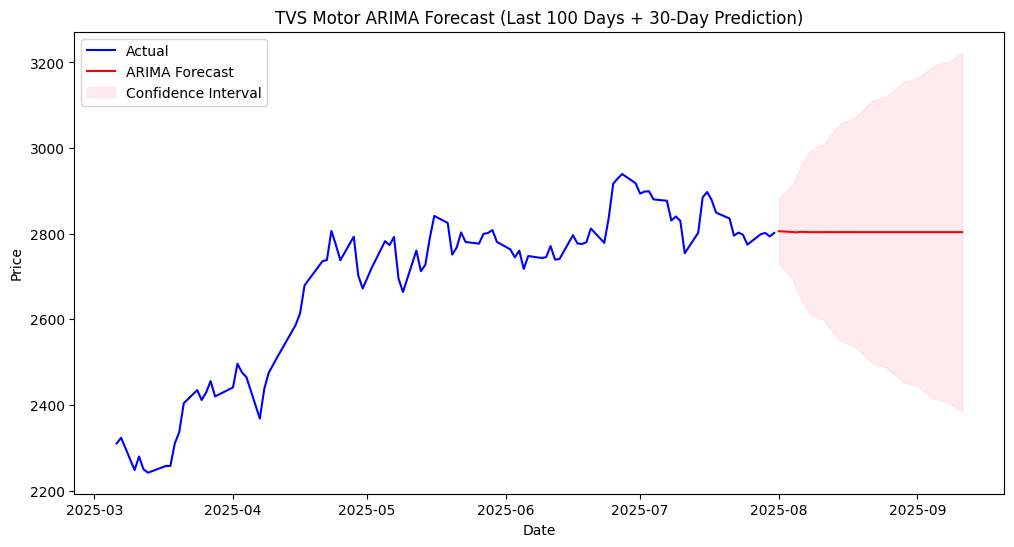

In [34]:
model = ARIMA(tvs['Close'].dropna(), order=(5,1,0))  # (p,d,q) can be tuned
model_fit = model.fit()
forecast_obj = model_fit.get_forecast(steps=30)
forecast = forecast_obj.predicted_mean
conf_int = forecast_obj.conf_int()
forecast_index = pd.date_range(start=tvs.index[-1] + pd.Timedelta(days=1),
                               periods=30, freq='B')
forecast.index = forecast_index
conf_int.index = forecast_index
plt.figure(figsize=(12,6))

plt.plot(tvs['Close'].iloc[-100:], label="Actual", color="blue")

plt.plot(forecast, label="ARIMA Forecast", color="red")

plt.fill_between(conf_int.index, conf_int.iloc[:,0], conf_int.iloc[:,1],
                 color='pink', alpha=0.3, label="Confidence Interval")

plt.legend()
plt.title("TVS Motor ARIMA Forecast (Last 100 Days + 30-Day Prediction)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


c:\Users\aacha\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aacha\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aacha\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aacha\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is ava

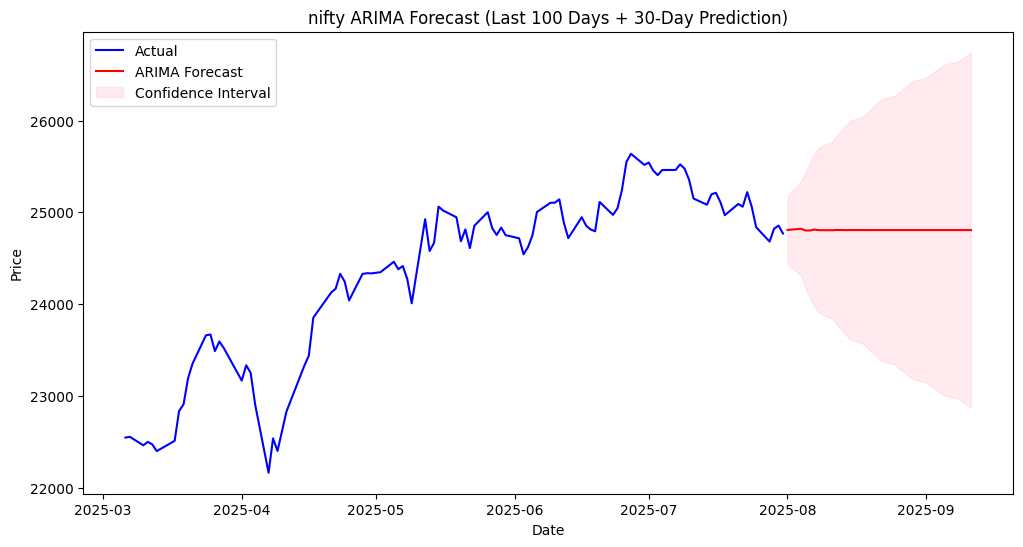

In [33]:
model = ARIMA(nifty['Close'].dropna(), order=(5,1,0))  
model_fit = model.fit()
forecast_obj = model_fit.get_forecast(steps=30)
forecast = forecast_obj.predicted_mean
conf_int = forecast_obj.conf_int()
forecast_index = pd.date_range(start=tvs.index[-1] + pd.Timedelta(days=1),
                               periods=30, freq='B')
forecast.index = forecast_index
conf_int.index = forecast_index
plt.figure(figsize=(12,6))

plt.plot(nifty['Close'].iloc[-100:], label="Actual", color="blue")

plt.plot(forecast, label="ARIMA Forecast", color="red")

plt.fill_between(conf_int.index, conf_int.iloc[:,0], conf_int.iloc[:,1],
                 color='pink', alpha=0.3, label="Confidence Interval")

plt.legend()
plt.title("nifty ARIMA Forecast (Last 100 Days + 30-Day Prediction)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

11:31:15 - cmdstanpy - INFO - Chain [1] start processing
11:31:17 - cmdstanpy - INFO - Chain [1] done processing


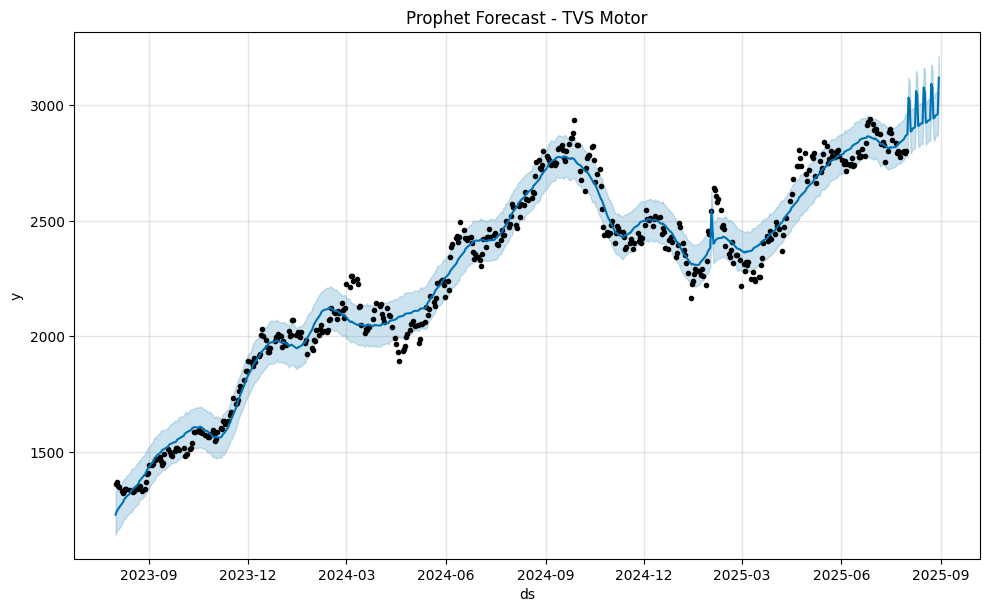

In [ ]:
df_prophet = tvs[['Close']].reset_index()
df_prophet.columns = ['ds','y']

m = Prophet()
m.fit(df_prophet)

future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

m.plot(forecast)
plt.title("Prophet Forecast - TVS Motor")
plt.show()

11:33:07 - cmdstanpy - INFO - Chain [1] start processing
11:33:07 - cmdstanpy - INFO - Chain [1] done processing


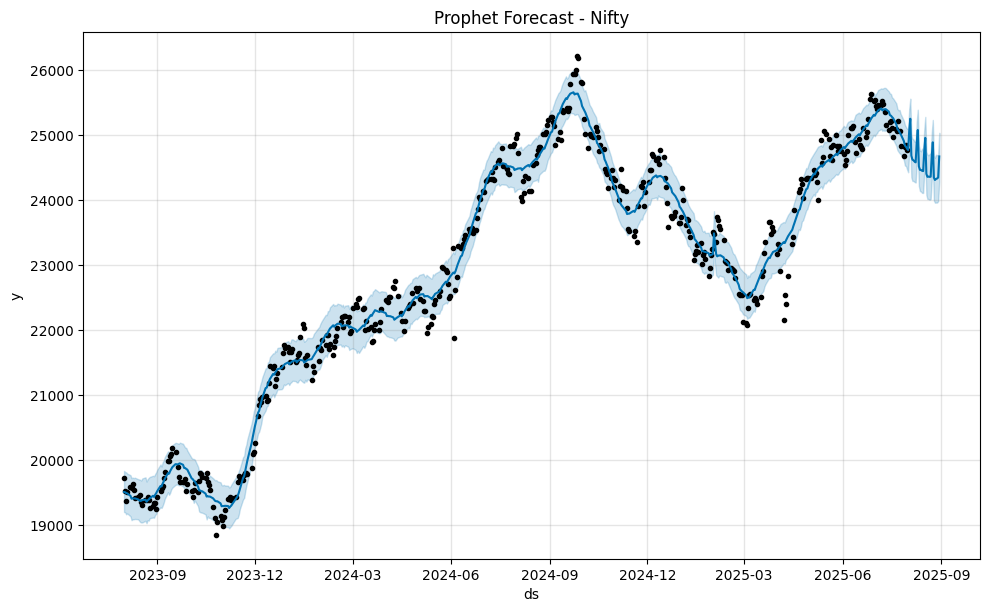

In [36]:
df_prophet = nifty[['Close']].reset_index()
df_prophet.columns = ['ds','y']

m = Prophet()
m.fit(df_prophet)

future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

m.plot(forecast)
plt.title("Prophet Forecast - Nifty")
plt.show()